In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
from torchinfo import summary

import easydict

from network_module import *


In [2]:
opt = easydict.EasyDict({
    "data_dir": '../dataset',
    "input_length": 220500,
    "image_height": 1025,
    "image_width": 431,
    "bbox_shape": 120,
    "mask_type": 'time_masking',
    "in_channels" : 2,
    "out_channels" : 1,
    "latent_channels" : 32,
    "pad_type": 'zero',
    "activation": 'lrelu',
    "norm":'in',
    "init_type":'xavier',
    "init_gain":0.02,
    "stage_num": 1,
    "batch_size": 4,
    })

In [9]:
class PatchDiscriminator(nn.Module):
    def __init__(self, opt):
        super(PatchDiscriminator, self).__init__()
        # Down sampling
        self.block1 = Conv2dLayer(opt.in_channels, opt.latent_channels, 7, 1, 3, pad_type = opt.pad_type, activation = opt.activation, norm = 'none', sn = 0)
        self.block2 = Conv2dLayer(opt.latent_channels, opt.latent_channels * 2, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block3 = Conv2dLayer(opt.latent_channels * 2, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block4 = Conv2dLayer(opt.latent_channels * 4, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block5 = Conv2dLayer(opt.latent_channels * 4, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block6 = Conv2dLayer(opt.latent_channels * 4, 1, 4, 2, 1, pad_type = opt.pad_type, activation = 'none', norm = 'none', sn = 0)
        
    def forward(self, img, mask):
        # the input x should contain 4 channels because it is a combination of recon image and mask
        x = torch.cat((img, mask), 1)
        x = self.block1(x)                                      # out: [B, 64, 256, 256]
        x = self.block2(x)                                      # out: [B, 128, 128, 128]
        x = self.block3(x)                                      # out: [B, 256, 64, 64]
        x = self.block4(x)                                      # out: [B, 256, 32, 32]
        x = self.block5(x)                                      # out: [B, 256, 16, 16]
        x = self.block6(x)                                      # out: [B, 256, 8, 8]
        return x

In [10]:
discriminator = PatchDiscriminator(opt)
summary(discriminator, [(4, 1, 1024, 428), (4, 1, 1024, 428)], device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
PatchDiscriminator                       --                        --
├─Conv2dLayer: 1-1                       [4, 32, 1024, 428]        --
│    └─ZeroPad2d: 2-1                    [4, 2, 1030, 434]         --
│    └─Conv2d: 2-2                       [4, 32, 1024, 428]        3,168
│    └─LeakyReLU: 2-3                    [4, 32, 1024, 428]        --
├─Conv2dLayer: 1-2                       [4, 64, 512, 214]         --
│    └─ZeroPad2d: 2-4                    [4, 32, 1026, 430]        --
│    └─Conv2d: 2-5                       [4, 64, 512, 214]         32,832
│    └─InstanceNorm2d: 2-6               [4, 64, 512, 214]         --
│    └─LeakyReLU: 2-7                    [4, 64, 512, 214]         --
├─Conv2dLayer: 1-3                       [4, 128, 256, 107]        --
│    └─ZeroPad2d: 2-8                    [4, 64, 514, 216]         --
│    └─Conv2d: 2-9                       [4, 128, 256, 107]        131,200
│  

In [8]:
discriminator = jj_Discriminator(opt)


NameError: name 'jj_Discriminator' is not defined

In [47]:
summary(discriminator, [(1, 1024, 428), (1, 1024, 428)], device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 512, 214]           1,056
         LeakyReLU-2         [-1, 32, 512, 214]               0
            Conv2d-3         [-1, 64, 256, 107]          32,832
         LeakyReLU-4         [-1, 64, 256, 107]               0
            Conv2d-5         [-1, 128, 128, 53]         131,200
         LeakyReLU-6         [-1, 128, 128, 53]               0
            Conv2d-7          [-1, 256, 64, 26]         524,544
           Sigmoid-8          [-1, 256, 64, 26]               0
            Linear-9                    [-1, 1]         425,985
          Sigmoid-10                    [-1, 1]               0
Total params: 1,115,617
Trainable params: 1,115,617
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 732736.00
Forward/backward pass size (MB): 100.00
Params size (MB): 4.26


In [48]:
a = torch.rand([4, 1])

In [50]:
torch.mean(a), a.mean()

(tensor(0.5344), tensor(0.5344))

In [11]:
class PatchDiscriminator(nn.Module):
    def __init__(self, opt):
        super(PatchDiscriminator, self).__init__()
        # Down sampling
        self.block1 = Conv2dLayer(opt.in_channels, opt.latent_channels, 7, 1, 3, pad_type = opt.pad_type, activation = opt.activation, norm = 'none', sn = 0)
        self.block2 = Conv2dLayer(opt.latent_channels, opt.latent_channels * 2, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block3 = Conv2dLayer(opt.latent_channels * 2, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block4 = Conv2dLayer(opt.latent_channels * 4, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block5 = Conv2dLayer(opt.latent_channels * 4, opt.latent_channels * 4, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = opt.norm, sn = 0)
        self.block6 = Conv2dLayer(opt.latent_channels * 4, 1, 4, 2, 1, pad_type = opt.pad_type, activation = opt.activation, norm = 'none', sn = 0)
        self.features_to_prob = nn.Sequential(
            nn.Linear(32 * 13, 1),
            nn.Sigmoid()
        )        
    def forward(self, img, mask):
        # the input x should contain 4 channels because it is a combination of recon image and mask
        x1 = torch.cat((img, mask), 1)
        x = self.block1(x1)                                      # out: [B, 64, 256, 256]
        x = self.block2(x)                                      # out: [B, 128, 128, 128]
        x = self.block3(x)                                      # out: [B, 256, 64, 64]
        x = self.block4(x)                                      # out: [B, 256, 32, 32]
        x = self.block5(x)                                      # out: [B, 256, 16, 16]
        x = self.block6(x)                                      # out: [B, 256, 8, 8]
        batch_size = x1.shape[0]
        x = x.view(batch_size, -1)        
        x = self.features_to_prob(x)
        return x

In [12]:
discriminator = PatchDiscriminator(opt)

In [14]:
summary(discriminator, [(4, 1, 1024, 428), (4, 1, 1024, 428)], device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
PatchDiscriminator                       --                        --
├─Conv2dLayer: 1-1                       [4, 32, 1024, 428]        --
│    └─ZeroPad2d: 2-1                    [4, 2, 1030, 434]         --
│    └─Conv2d: 2-2                       [4, 32, 1024, 428]        3,168
│    └─LeakyReLU: 2-3                    [4, 32, 1024, 428]        --
├─Conv2dLayer: 1-2                       [4, 64, 512, 214]         --
│    └─ZeroPad2d: 2-4                    [4, 32, 1026, 430]        --
│    └─Conv2d: 2-5                       [4, 64, 512, 214]         32,832
│    └─InstanceNorm2d: 2-6               [4, 64, 512, 214]         --
│    └─LeakyReLU: 2-7                    [4, 64, 512, 214]         --
├─Conv2dLayer: 1-3                       [4, 128, 256, 107]        --
│    └─ZeroPad2d: 2-8                    [4, 64, 514, 216]         --
│    └─Conv2d: 2-9                       [4, 128, 256, 107]        131,200
│  

In [88]:
q.shape

torch.Size([128, 258, 107])

In [53]:
b.shape

torch.Size([1, 2048, 428])

In [38]:
first_out.shape

torch.Size([1, 2, 512, 428])

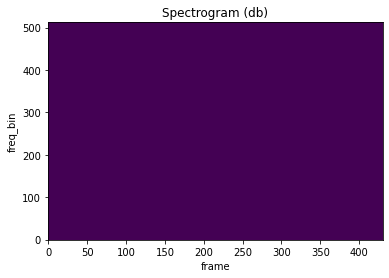

In [14]:
t = img[0,0,:,:]
fig, axs = plt.subplots(1, 1)
axs.set_title('Spectrogram (db)')
axs.set_ylabel('freq_bin')
axs.set_xlabel('frame')
im = axs.imshow(librosa.amplitude_to_db(t), origin='lower', aspect='auto')
if None:
    axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)

plt.savefig('test.png')